# PROJECT 2: “INFORMATION THEORY AND CRYPTOGRAPHY”
Cryptography is the study of protecting data by converting it into a secure format that allows only the intended users to access it. The study area has strong connections to information theory, particularly the concept of entropy. In this project, you explore this connection via the one-time pad encryption technique as follows:

- Study and describe how one-time pad encryption chooses the key and generates a cipher from the plaintext.
- Define perfect secrecy using entropy and prove that the one-time pad can achieve it.
- Choose an English passage with more than 2000 characters as the plaintext.
- Define a set of possible plaintext characters and compute their probability distribution using the frequency of each character appearing in the passage.
- Apply the one-time pad on the plaintext to obtain ciphertext.
- Plot the unconditional distribution of the plaintext characters and their distribution conditioned on a cipher character.
- Verify the above claim by computing the entropies of two distributions.

Present your study in a report with appropriate references, which must be uploaded to the Information Theory and Cryptography folder. The report should demonstrate your understanding of the one-time pad technique, details of the proof, and simulation results. You are encouraged to add any other ideas/results, however small.

In [1]:
# 1. Key Generation and Encryption
import numpy as np
import random
import string

def generate_random_key(length):
    """Generate a random key of specified length from the allowed character set."""
    charset = string.ascii_lowercase + ' .,;:-\'"\n'
    key = ''.join(random.choice(charset) for _ in range(length))
    return key

def one_time_pad_encrypt(plaintext, key):
    """Encrypt plaintext with key using modular addition."""
    charset = string.ascii_lowercase + ' .,;:-\'"\n'
    char_to_num = {char: idx for idx, char in enumerate(charset)}
    num_to_char = {idx: char for idx, char in enumerate(charset)}
    modulus = len(charset)

    ciphertext = []
    for p_char, k_char in zip(plaintext, key):
        if p_char in charset and k_char in charset:
            p_val = char_to_num[p_char]
            k_val = char_to_num[k_char]
            c_val = (p_val + k_val) % modulus
            ciphertext.append(num_to_char[c_val])
        else:
            ciphertext.append(p_char)  # fallback to preserve unknowns
    return ''.join(ciphertext)


In [2]:
# 2. Perfect Secrecy and Entropy Definitions
from math import log2

def entropy(probabilities):
    """Calculate entropy from a probability distribution."""
    return -sum(p * log2(p) for p in probabilities if p > 0)

def print_entropy(plaintext_probs, conditional_probs):
    H_P = entropy(plaintext_probs)
    H_P_given_C = entropy(conditional_probs)
    print(f"Unconditional entropy H(P): {H_P:.4f} bits")
    print(f"Conditional entropy H(P|C): {H_P_given_C:.4f} bits")


In [4]:
# 3. Load Text and Calculate Plaintext Distribution
import collections

# Load a large English passage from file or paste here
with open("dante.txt", "r") as f:
    plaintext = f.read().lower()

# Trim or pad to at least 2000 characters
plaintext = plaintext[:2000]

# Define the character set
charset = string.ascii_lowercase + ' .,;:-\'"\n'
char_counts = collections.Counter(c for c in plaintext if c in charset)
total_chars = sum(char_counts.values())
plaintext_probs = [char_counts[char] / total_chars for char in charset]

# Display top frequencies
print("Plaintext character distribution:")
for char in charset:
    print(f"'{char}': {char_counts[char]/total_chars:.4f}")


Plaintext character distribution:
'a': 0.0675
'b': 0.0100
'c': 0.0175
'd': 0.0320
'e': 0.1031
'f': 0.0155
'g': 0.0115
'h': 0.0590
'i': 0.0515
'j': 0.0005
'k': 0.0030
'l': 0.0335
'm': 0.0260
'n': 0.0520
'o': 0.0555
'p': 0.0155
'q': 0.0000
'r': 0.0420
's': 0.0640
't': 0.0720
'u': 0.0200
'v': 0.0090
'w': 0.0220
'x': 0.0005
'y': 0.0045
'z': 0.0000
' ': 0.1556
'.': 0.0065
',': 0.0185
';': 0.0040
':': 0.0005
'-': 0.0000
''': 0.0005
'"': 0.0030
'
': 0.0235


In [5]:
# 4. Encrypt Plaintext with One-Time Pad
key = generate_random_key(len(plaintext))
ciphertext = one_time_pad_encrypt(plaintext, key)

# Save ciphertext for later analysis
with open("ciphertext.txt", "w") as f:
    f.write(ciphertext)


In [6]:
# 5. Analyze Conditional Distributions
# Select one ciphertext character to analyze conditional probabilities
selected_cipher_char = ciphertext[random.randint(0, len(ciphertext)-1)]
print(f"Selected ciphertext character: '{selected_cipher_char}'")

# Count occurrences of plaintext characters conditioned on selected ciphertext character
conditional_counts = collections.Counter()
total_conditioned = 0

for p_char, c_char in zip(plaintext, ciphertext):
    if c_char == selected_cipher_char and p_char in charset:
        conditional_counts[p_char] += 1
        total_conditioned += 1

# Calculate conditional probabilities
conditional_probs = [conditional_counts[char]/total_conditioned if total_conditioned > 0 else 0.0 for char in charset]

print("\nConditional character distribution:")
for char, prob in zip(charset, conditional_probs):
    print(f"'{char}': {prob:.4f}")


Selected ciphertext character: 'e'

Conditional character distribution:
'a': 0.0735
'b': 0.0147
'c': 0.0294
'd': 0.0294
'e': 0.0882
'f': 0.0147
'g': 0.0294
'h': 0.0588
'i': 0.0735
'j': 0.0000
'k': 0.0000
'l': 0.0147
'm': 0.0147
'n': 0.0441
'o': 0.0294
'p': 0.0294
'q': 0.0000
'r': 0.0441
's': 0.0294
't': 0.1324
'u': 0.0000
'v': 0.0294
'w': 0.0294
'x': 0.0000
'y': 0.0294
'z': 0.0000
' ': 0.1176
'.': 0.0000
',': 0.0147
';': 0.0000
':': 0.0000
'-': 0.0000
''': 0.0000
'"': 0.0000
'
': 0.0294


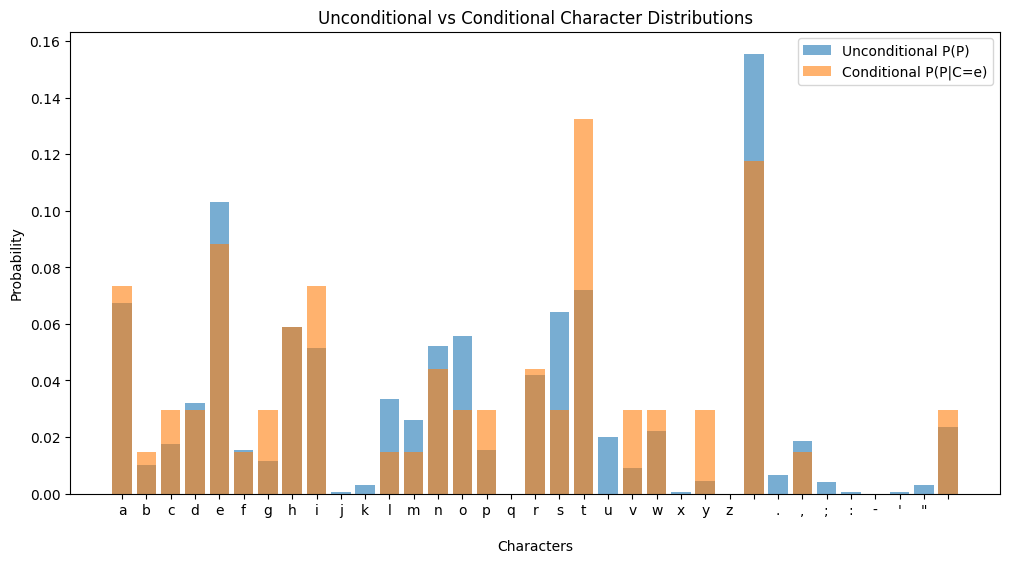

In [7]:
# 6. Plot Distributions
import matplotlib.pyplot as plt

x = list(charset)
plt.figure(figsize=(12,6))
plt.bar(x, plaintext_probs, alpha=0.6, label='Unconditional P(P)')
plt.bar(x, conditional_probs, alpha=0.6, label=f'Conditional P(P|C={selected_cipher_char})')
plt.xlabel('Characters')
plt.ylabel('Probability')
plt.legend()
plt.title('Unconditional vs Conditional Character Distributions')
plt.show()


In [8]:
# 7. Calculate and Compare Entropies
print_entropy(plaintext_probs, conditional_probs)


Unconditional entropy H(P): 4.2572 bits
Conditional entropy H(P|C): 4.1938 bits
